### Data Dictionary

We'll be using the dataset murders.csv. This data is provided by the U.S. Census Bureau and the FBI

### Import Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn

import xgboost as xgb
from xgboost import XGBClassifier, XGBRegressor
from xgboost import to_graphviz, plot_importance

from sklearn.experimental import enable_hist_gradient_boosting
from sklearn.ensemble import _hist_gradient_boosting
from sklearn.ensemble import HistGradientBoostingRegressor, HistGradientBoostingRegressor

%matplotlib inline
sns.set_style('dark')
sns.set(font_scale=1.5)

from sklearn.model_selection import cross_val_score, train_test_split, GridSearchCV, RandomizedSearchCV
from sklearn.preprocessing import LabelEncoder, StandardScaler, MinMaxScaler, OneHotEncoder
from sklearn.metrics import confusion_matrix, classification_report, mean_absolute_error, mean_squared_error,r2_score
from sklearn.metrics import plot_confusion_matrix, plot_precision_recall_curve, plot_roc_curve, accuracy_score
from sklearn.metrics import auc, f1_score, precision_score, recall_score, roc_auc_score


import feature_engine.missing_data_imputers as mdi
from feature_engine.outlier_removers import Winsorizer

from tpot import TPOTClassifier, TPOTRegressor

import warnings
warnings.filterwarnings('ignore')

pd.options.display.max_columns= None
#pd.options.display.max_rows = None

### Data Exploration

In [2]:
df = pd.read_csv("murders.csv")

In [3]:
df

,State,Population,PopulationDensity,Murders,GunMurders,GunOwnership
0,Alabama,4779736,94.650,199,135,0.517
1,Alaska,710231,1.264,31,19,0.578
2,Arizona,6392017,57.050,352,232,0.311
3,Arkansas,2915918,56.430,130,93,0.553
4,California,37253956,244.200,1811,1257,0.213
5,Colorado,5029196,49.330,117,65,0.347
6,Connecticut,3574097,741.400,131,97,0.167
7,Delaware,897934,470.700,48,38,0.255
8,District of Columbia,601723,10298.000,131,99,0.036
9,Florida,19687653,360.200,987,669,0.245


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51 entries, 0 to 50
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   State              51 non-null     object 
 1   Population         51 non-null     int64  
 2   PopulationDensity  51 non-null     float64
 3   Murders            51 non-null     int64  
 4   GunMurders         51 non-null     int64  
 5   GunOwnership       51 non-null     float64
dtypes: float64(2), int64(3), object(1)
memory usage: 2.5+ KB


In [5]:
df.describe(include='all')

,State,Population,PopulationDensity,Murders,GunMurders,GunOwnership
count,51,5.100000e+01,51.000000,51.000000,51.000000,51.000000
unique,51,NaN,NaN,NaN,NaN,NaN
top,New Mexico,NaN,NaN,NaN,NaN,NaN
freq,1,NaN,NaN,NaN,NaN,NaN
mean,NaN,6.075769e+06,394.548804,273.196078,184.372549,0.369451
std,NaN,6.860669e+06,1437.947627,343.853982,236.126149,0.140612
min,NaN,5.636260e+05,1.264000,7.000000,2.000000,0.036000
25%,NaN,1.696962e+06,46.185000,49.500000,24.500000,0.305500
50%,NaN,4.339367e+06,102.600000,151.000000,97.000000,0.398000
75%,NaN,6.636084e+06,224.350000,394.000000,268.000000,0.440000


In [6]:
df.shape

(51, 6)

In [7]:
df.columns

Index(['State', 'Population', 'PopulationDensity', 'Murders', 'GunMurders',
       'GunOwnership'],
      dtype='object')

### Data Visualization

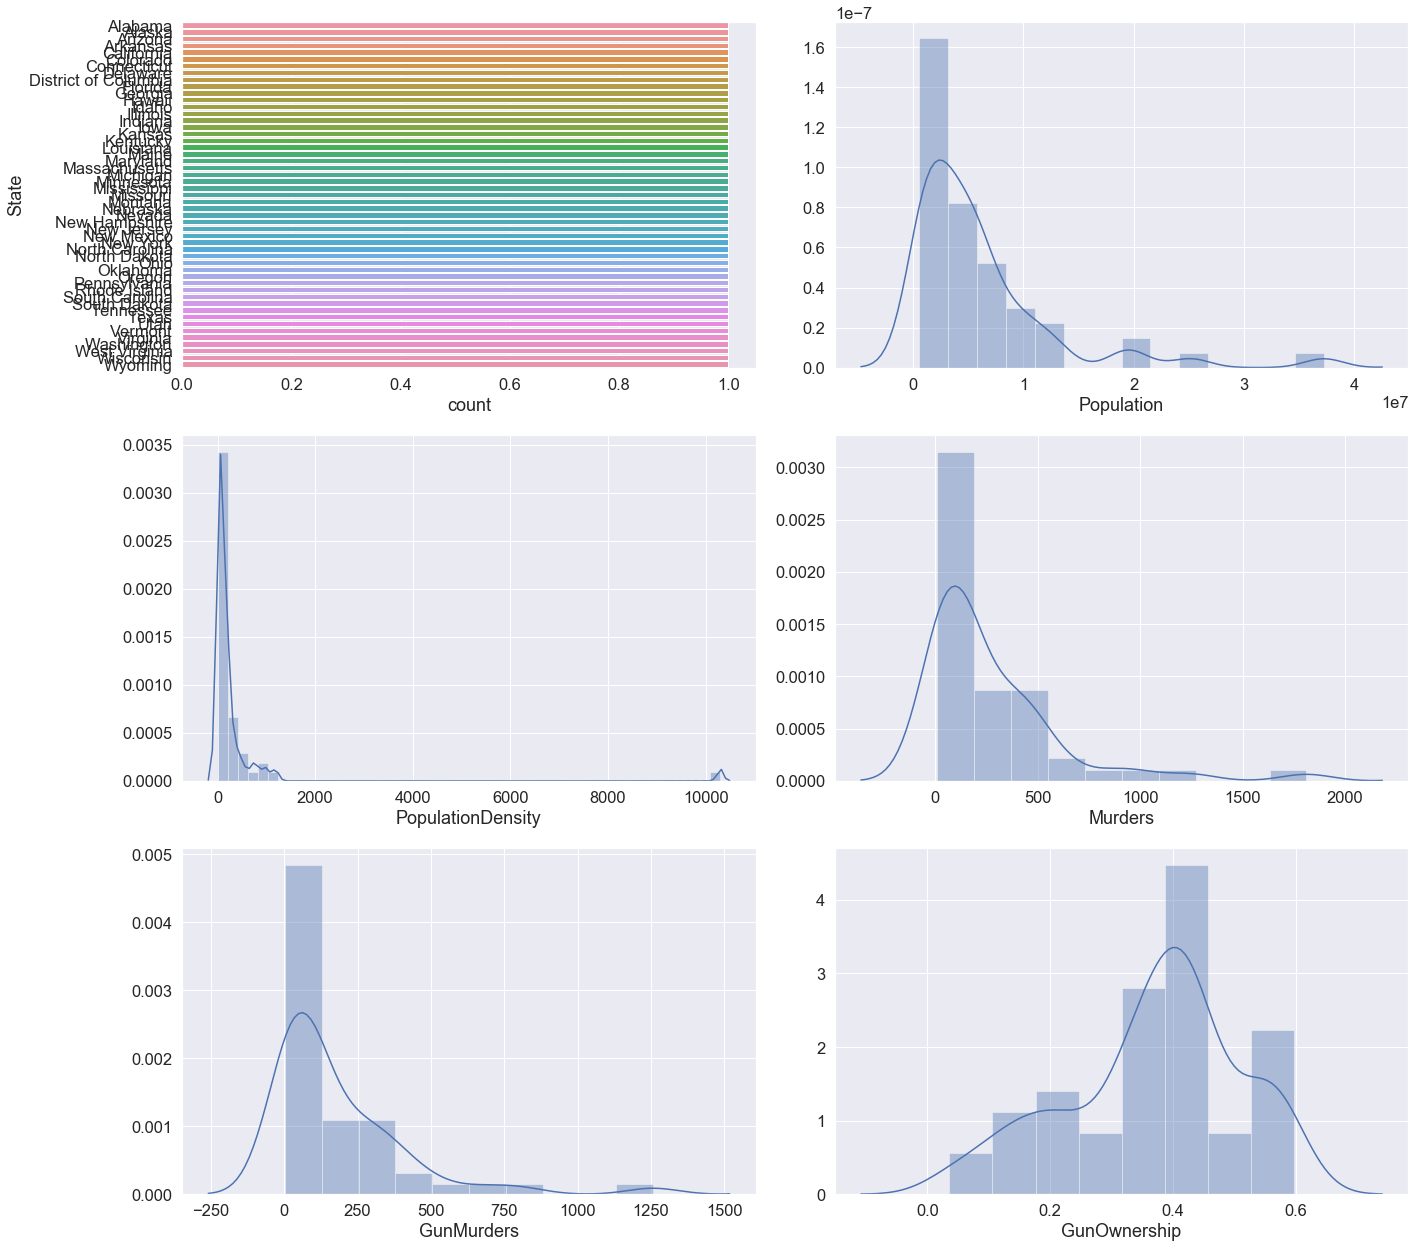

In [8]:
fig = plt.figure(figsize=(20,40))

plt.subplot(7,2,1)
sns.countplot(y = df.State)
plt.subplot(7,2,2)
sns.distplot(df.Population)
plt.subplot(7,2,3)
sns.distplot(df.PopulationDensity)
plt.subplot(7,2,4)
sns.distplot(df.Murders)
plt.subplot(7,2,5)
sns.distplot(df.GunMurders)
plt.subplot(7,2,6)
sns.distplot(df.GunOwnership)
# plt.subplot(7,2,7)
# sns.countplot()
# plt.subplot(7,2,8)
# sns.countplot()
# plt.subplot(7,2,9)
# sns.countplot()
# plt.subplot(7,2,10)
# sns.countplot()
# plt.subplot(7,2,11)
# sns.countplot()
# plt.subplot(7,2,12)
# sns.countplot()
# plt.subplot(7,2,13)
# sns.countplot()
# plt.subplot(7,2,14)
# sns.countplot()

plt.tight_layout()
plt.show()

### Bivariate Data Exploration

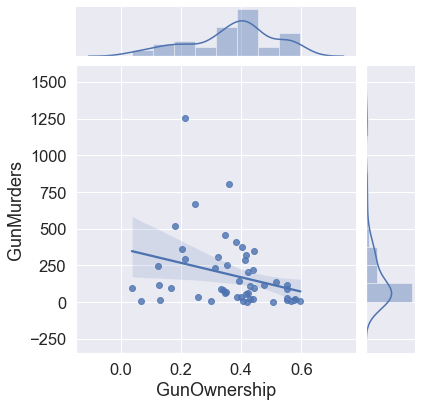

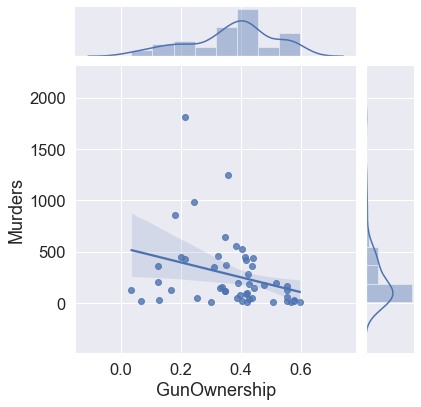

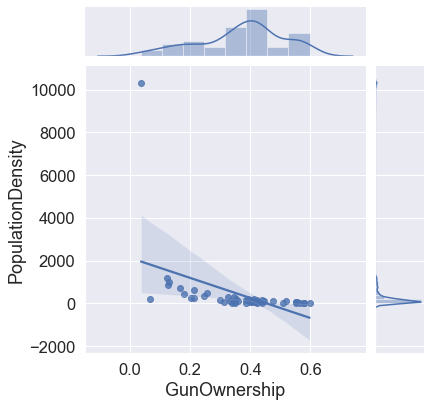

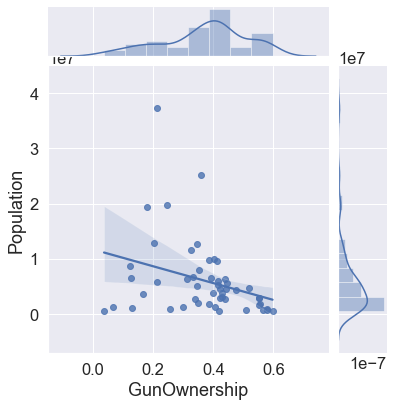

In [9]:
sns.jointplot(x='GunOwnership', y='GunMurders',data=df, kind='reg')

sns.jointplot(x='GunOwnership', y='Murders',data=df, kind='reg')

sns.jointplot(x='GunOwnership', y='PopulationDensity',data=df, kind='reg')

sns.jointplot(x='GunOwnership', y='Population',data=df, kind='reg')

plt.show()

In [10]:
df.corr()

,Population,PopulationDensity,Murders,GunMurders,GunOwnership
Population,1.000000,-0.080535,0.973735,0.963596,-0.312147
PopulationDensity,-0.080535,1.000000,-0.028398,-0.021605,-0.458340
Murders,0.973735,-0.028398,1.000000,0.996358,-0.297106
GunMurders,0.963596,-0.021605,0.996358,1.000000,-0.291383
GunOwnership,-0.312147,-0.458340,-0.297106,-0.291383,1.000000


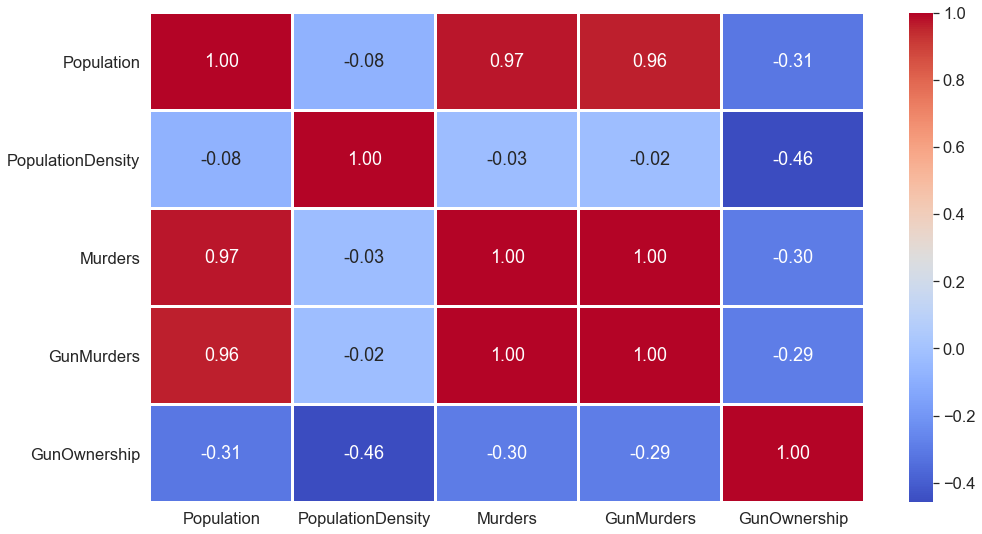

In [11]:
plt.figure(figsize=(16,9))
sns.heatmap(df.corr(),cmap="coolwarm",annot=True,fmt='.2f',linewidths=2)
plt.show()

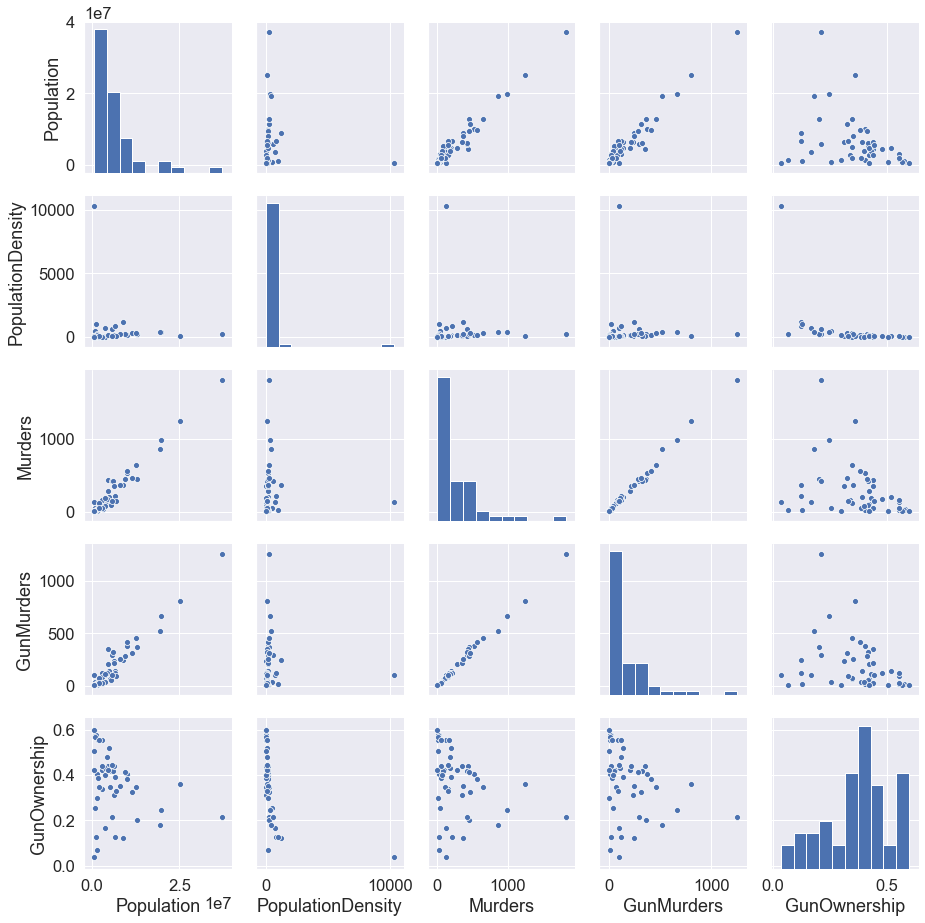

In [12]:
sns.pairplot(df)
plt.show()